In [1]:
pip install numpy pandas pillow matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [3]:
filenames=os.listdir(r"D:\val2017\val2017")

In [4]:
type(filenames)

list

In [5]:
len(filenames)

5000

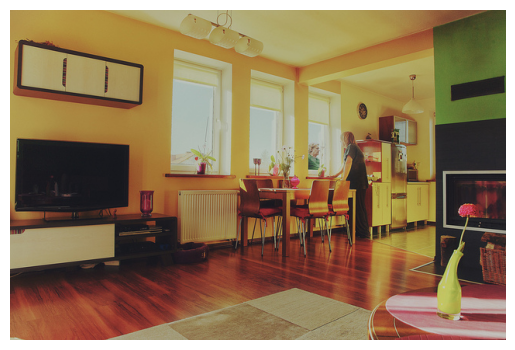

In [6]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r"D:\val2017\val2017\000000000139.jpg")

# Convert BGR (OpenCV default) to RGB (matplotlib expects RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(img_rgb)
plt.axis("off")  # hide axis
plt.show()


In [7]:
annFile = r"D:\val2017\annotations\instances_val2017.json"
image_dir = r"D:\val2017\val2017"

In [8]:
# Number of images
filenames = os.listdir(image_dir)
print("Total images:", len(filenames))
print("First 5 images:", filenames[:5])
print("Last 5 images:", filenames[-5:])

Total images: 5000
First 5 images: ['000000000139.jpg', '000000000285.jpg', '000000000632.jpg', '000000000724.jpg', '000000000776.jpg']
Last 5 images: ['000000581317.jpg', '000000581357.jpg', '000000581482.jpg', '000000581615.jpg', '000000581781.jpg']


In [9]:
from pycocotools.coco import COCO

# Load COCO annotations
coco = COCO(annFile)

cats = coco.loadCats(coco.getCatIds())
print("Categories:", [cat["name"] for cat in cats])


loading annotations into memory...
Done (t=1.30s)
creating index...
index created!
Categories: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


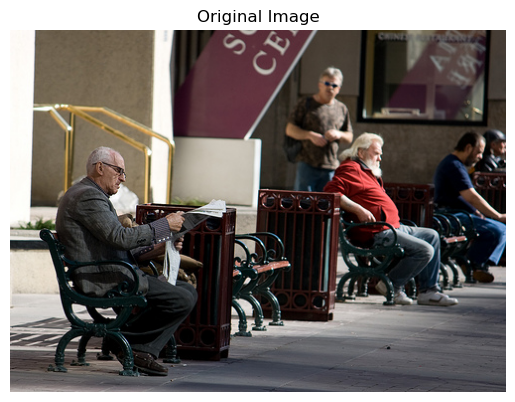

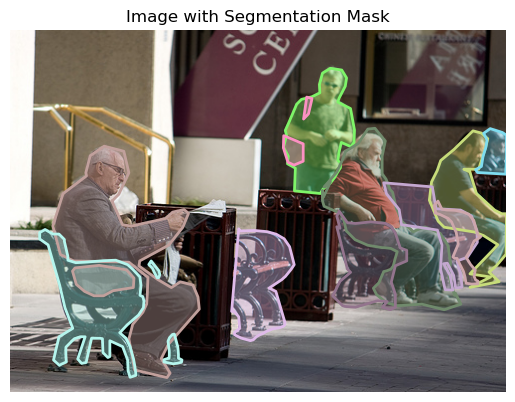

In [10]:
import random
import matplotlib.pyplot as plt
import skimage.io as io

# Pick random image
img_id = random.choice(coco.getImgIds())
img_info = coco.loadImgs(img_id)[0]

# Load image
img_path = os.path.join(image_dir, img_info["file_name"])
img = io.imread(img_path)

# Show original image
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

# Load annotations (masks)
annIds = coco.getAnnIds(imgIds=img_info["id"])
anns = coco.loadAnns(annIds)

# Show image with mask overlay
plt.imshow(img)
plt.axis("off")
coco.showAnns(anns)
plt.title("Image with Segmentation Mask")
plt.show()


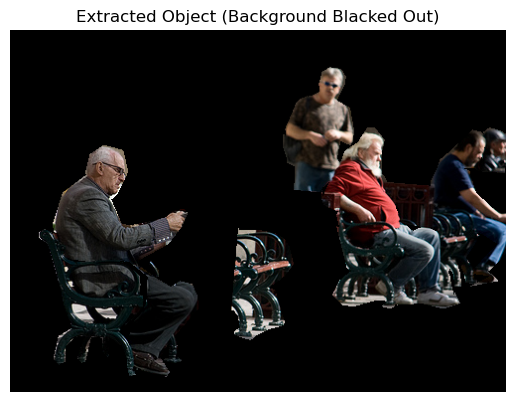

✅ Extracted object saved as extracted_object.jpg


In [11]:
import numpy as np

# Make an empty mask
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

for ann in anns:
    m = coco.annToMask(ann) 
    mask = np.maximum(mask, m)  


# Keep object pixels, set background to black
extracted_object = img.copy()
extracted_object[mask == 0] = 0   # background to be black

# Show extracted image object
plt.imshow(extracted_object)
plt.axis("off")
plt.title("Extracted Object (Background Blacked Out)")
plt.show()

io.imsave("extracted_object.jpg", extracted_object)
print("✅ Extracted object saved as extracted_object.jpg")
